## Multiple Regression - Student Achievement

This data is about student performance in dairly life and thier grade. There are 395 rows in the data. We are interested in whether the student behaviors have correlation with their grade. In the experiment, we set:

- Dependent (y) = 3nd period grade

- Independent (X) = studytime(X1) ,failures (X2), familyrelationship(X3), absences(X4) ,1st period grade (X5), 2nd period grade(X6)


#### Chosen dataset

### Kaggle dataset

https://www.kaggle.com/dipam7/student-grade-prediction

### Explore the data

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("student-mat.csv", sep = ";")

In [130]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Cleanup and Transform the data

### Extract the data with specific columns that we need for analysis

Here we take to sub-dataset- data_1 to do analysis

In [7]:
data_1 = data.iloc[:,[13,14,23,29,30,31,32]]

# extract data with columns studytime, failure, famrel, absences, G1, G2, G3

### Detect the missing data

In [8]:
data_1.isnull().sum()
# detect the missing data

studytime    0
failures     0
famrel       0
absences     0
G1           0
G2           0
G3           0
dtype: int64

### Rename the column names

In [9]:
data_1.columns = ["studytime","failures","familyrelationship","absences","1st period grade", "2nd period grade", "3rd period grade"]

### Let's take a look at the data

In [11]:
data_1.describe()

,studytime,failures,familyrelationship,absences,1st period grade,2nd period grade,3rd period grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,0.334177,3.944304,5.708861,10.908861,10.713924,10.415190
std,0.839240,0.743651,0.896659,8.003096,3.319195,3.761505,4.581443
min,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,0.000000,4.000000,0.000000,8.000000,9.000000,8.000000
50%,2.000000,0.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,2.000000,0.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,4.000000,3.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Remove the outliers to make it more tidy

In [12]:
Q1 = data_1.quantile(0.25)
Q3 = data_1.quantile(0.75)
IQR = Q3 - Q1

In [15]:
data_1 = data_1[~((data_1 < (Q1 - 1.5 * IQR)) |(data_1 > (Q3 + 1.5 * IQR))).any(axis=1)]

### Let's see~

Original data have 395 rows, after removing outliers, there are 254 rows

In [16]:
data_1.describe()

,studytime,failures,familyrelationship,absences,1st period grade,2nd period grade,3rd period grade
count,254.000000,254.0,254.000000,254.000000,254.000000,254.000000,254.000000
mean,1.940945,0.0,4.106299,4.267717,11.464567,11.570866,11.582677
std,0.677458,0.0,0.689073,4.594117,3.102454,3.112022,3.579566
min,1.000000,0.0,3.000000,0.000000,5.000000,5.000000,0.000000
25%,1.000000,0.0,4.000000,0.000000,9.000000,9.000000,10.000000
50%,2.000000,0.0,4.000000,2.500000,11.000000,11.000000,11.000000
75%,2.000000,0.0,5.000000,6.000000,14.000000,14.000000,14.000000
max,3.000000,0.0,5.000000,20.000000,19.000000,19.000000,19.000000


### Okay, seems good to go!

## Analysis

### Function: graph the scatter plot

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot(df):
    sns.set(font_scale=2)
    sns.set_style('whitegrid')
    for col in df.drop("3rd period grade", axis = 1).columns:
        plt.figure(figsize=(16, 9))
        sns.scatterplot(data=df, x=col, y='3rd period grade', 
                     hue='3rd period grade', 
                     palette='cool', legend=False)

### Scatterplots of each independent variable vs. the dependent variable (3rd period grade)

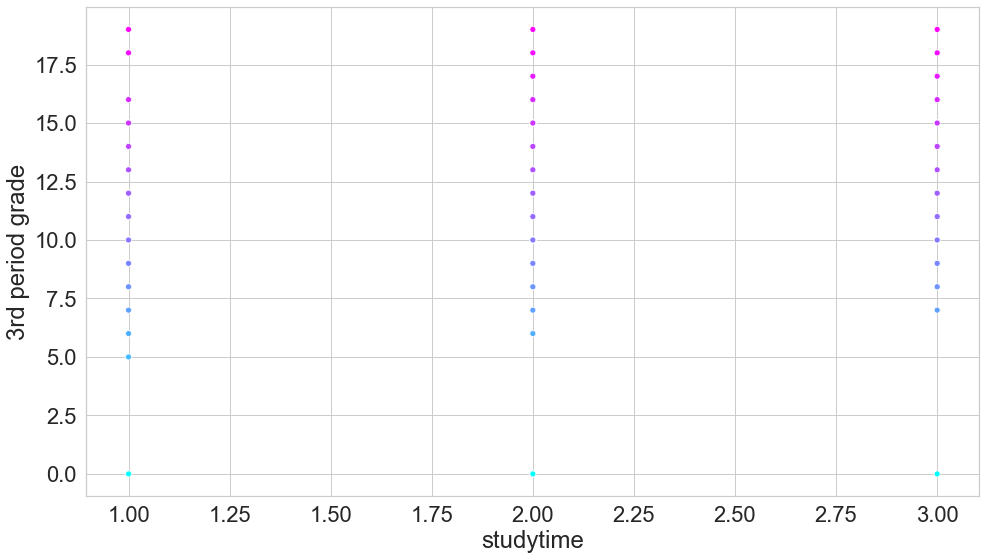

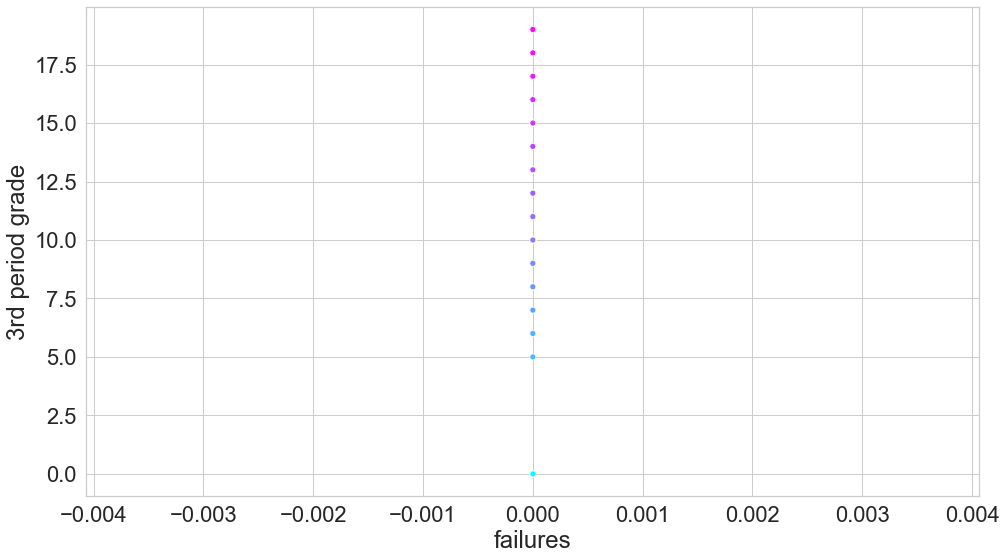

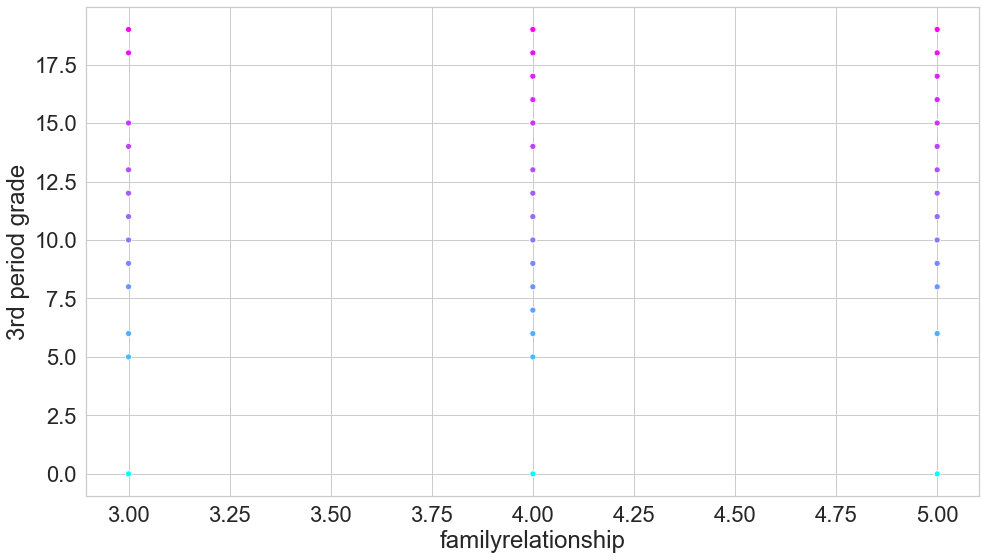

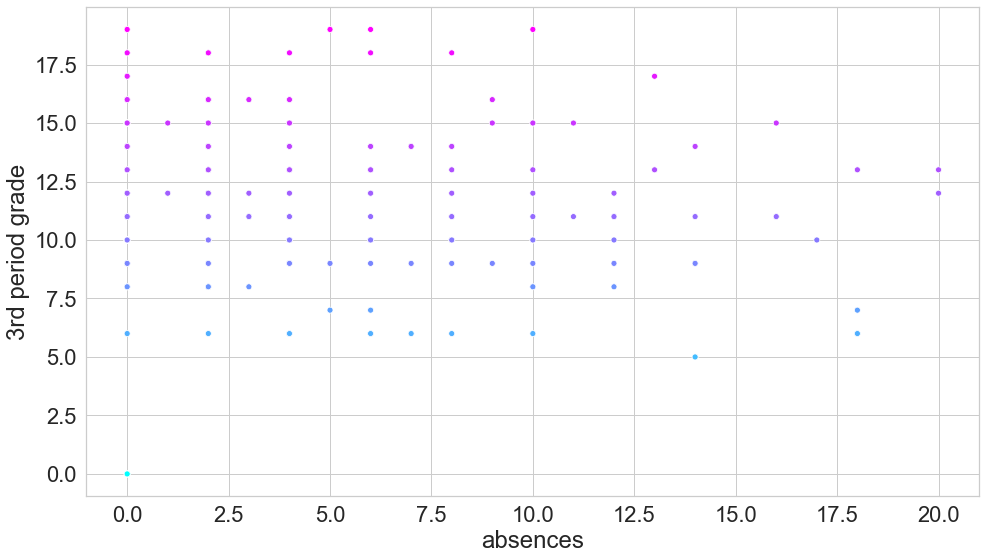

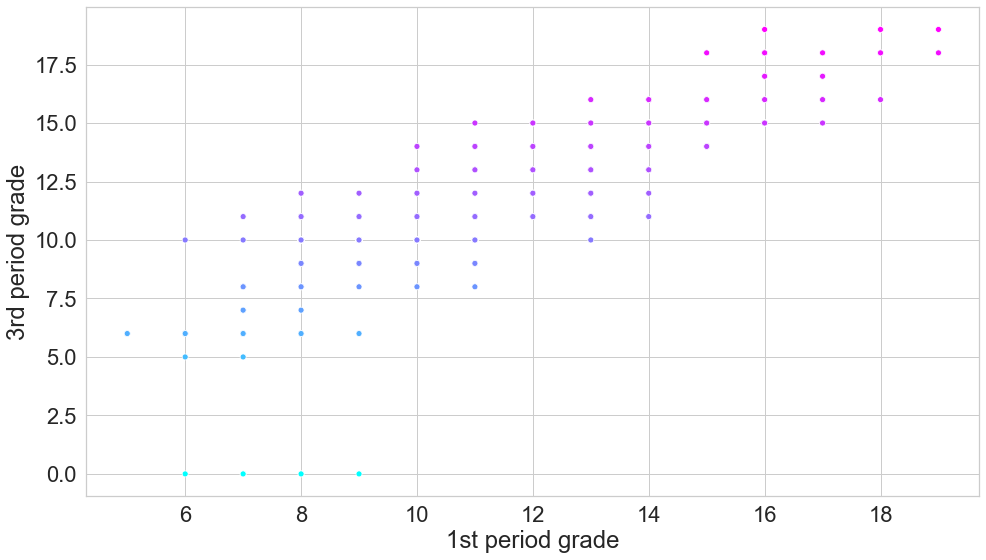

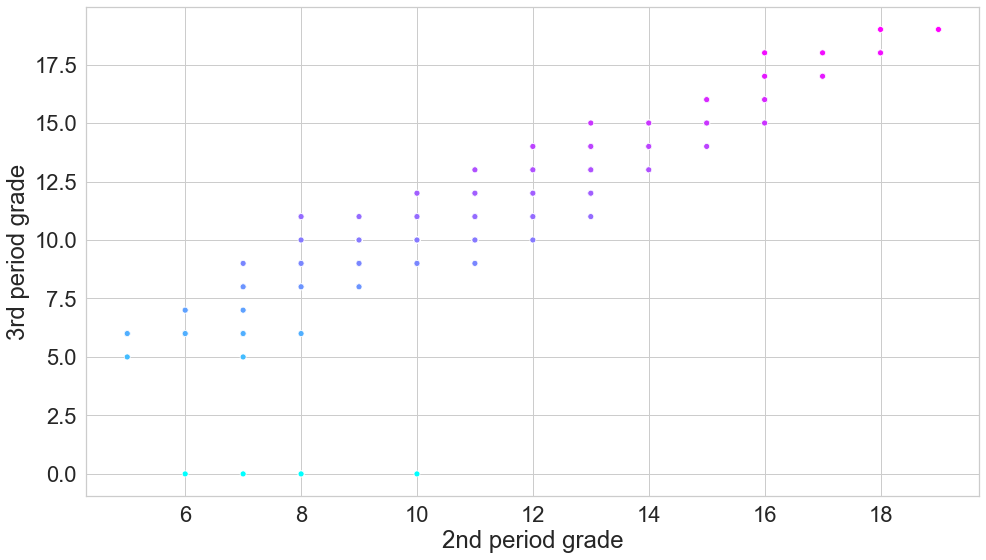

In [18]:
scatter_plot(data_1)

### Split the dataset to train and test dataset

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_1.drop("3rd period grade", axis = 1), data_1["3rd period grade"], random_state=11)

In [27]:
print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (190, 6)
Shape of testing  set = (64, 6)


### Build the multiple linear regression model with train dataset

In [30]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X=X_train, y=y_train)

coeff = linear.coef_
intercept = linear.intercept_

for i, name in enumerate(data_1.columns):
    if name != "3rd period grade":
        print(f'{name:20}: {coeff[i]:24.20f}')
        # regression coefficient (slope) of each x variable

print()
print(f'y-intercept: {intercept:23.20f}')
print("The R^2 is: ", linear.score(X_test, y_test))

studytime           :  -0.00742791631837057785
failures            :  -0.00000000000000127676
familyrelationship  :   0.16638384341273146361
absences            :   0.04265186233302443314
1st period grade    :   0.16920470249023786269
2nd period grade    :   0.90696894496704882904

y-intercept: -1.67004707510673711113
The R^2 is:  0.858961200794055


### Test the model with X_test and print out the accuracy rate of prediction

In [31]:
import numpy as np

predicted = np.array(linear.predict(X_test))
expected  = np.array(y_test)

count = 0
for i, j in zip(expected, predicted):
    #print(i, j, i == round(j))
    if i == round(j):
        count += 1
print("accuracy rate of prediction =", count/len(predicted))

accuracy rate of prediction = 0.453125


### Compute the coefficient of determination and correlation coefficient

In [32]:
import math
from sklearn import metrics

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.2f}')
print(f'     correlation coefficient = {r:.2f}')

coefficient of determination = 0.86
     correlation coefficient = 0.93


### Strong linear correlation

### Graph the scatter plot and regression line of expected y value and predicted y value

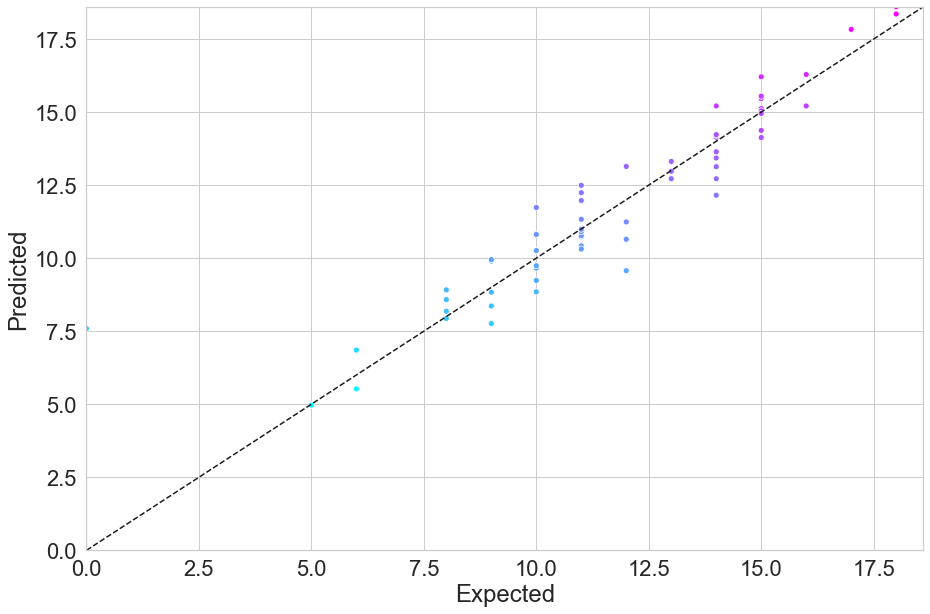

In [33]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')